In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import sklearn

import skimage.io
import skimage.feature
import skimage.transform

import os
from glob import glob
import re
import pickle

# matplotlib inline

In [2]:
# read the folders in a list
folder = os.listdir('data')
print(folder)
print(len(folder))

['BearHead', 'CatHead', 'ChickenHead', 'CowHead', 'DeerHead', 'DogHead', 'DuckHead', 'EagleHead', 'ElephantHead', 'HumanHead', 'LionHead', 'MonkeyHead', 'MouseHead', 'Natural', 'PandaHead', 'PigeonHead', 'RabbitHead', 'SheepHead', 'TigerHead', 'WolfHead']
20


In [3]:
all_path =[]
for f in folder:
    all_path += glob(f'./data/{f}/*.jpg')

In [4]:
len(all_path)

2057

In [5]:
# all_path

In [6]:
# read all image and label
img_all = skimage.io.ImageCollection(all_path)

In [7]:
len(img_all)

2057

In [8]:
# img_all.files

In [9]:
# re.search(r'./data/(.*?)Head\\','./data/DeerHead\\gggggg.jpg').group(1)

In [10]:
# labeling
# extract text folder
def extract_label(text):
    try:
        label = re.search(r'./data/(.*?)Head\\',text).group(1)
    except:
        label = re.search(r'./data/(.*?)\\',text).group(1)
        
    return label.lower()

In [11]:
labels = list(map(extract_label, img_all.files))

In [12]:
len(labels)

2057

In [13]:
set(labels), len(set(labels))

({'bear',
  'cat',
  'chicken',
  'cow',
  'deer',
  'dog',
  'duck',
  'eagle',
  'elephant',
  'human',
  'lion',
  'monkey',
  'mouse',
  'natural',
  'panda',
  'pigeon',
  'rabbit',
  'sheep',
  'tiger',
  'wolf'},
 20)

In [14]:
img_all

In [16]:
# list(img_all)

In [17]:
def buffer(io):
    return io

# img_all_arrs = np.array(list(map(buffer,img_all)))
img_all_arrs = np.array(list(img_all))

In [18]:
img_all_arrs.shape

(2057, 80, 80, 3)

In [22]:
# img_all[0]

# plt.imshow(img_all[0])

In [23]:
data = dict()

data['description'] = 'There are 20 classes and 2057 images are there. All the images are 80 x 80 (rgb)'
data['data'] = img_all_arrs
data['target'] = labels
data['labels'] = set(labels)

In [2]:
# save the file in pickle
import pickle
import collections

In [50]:
pickle.dump(data,open('data_animals_head_20.pickle','wb'))

---

In [3]:
data = pickle.load(open('data_animals_head_20.pickle','rb'))

In [5]:
count_values = collections.Counter(data['target'])
count_values

Counter({'bear': 101,
         'cat': 159,
         'chicken': 100,
         'cow': 103,
         'deer': 103,
         'dog': 132,
         'duck': 103,
         'eagle': 100,
         'elephant': 100,
         'human': 100,
         'lion': 102,
         'monkey': 100,
         'mouse': 100,
         'natural': 8,
         'panda': 118,
         'pigeon': 115,
         'rabbit': 100,
         'sheep': 100,
         'tiger': 113,
         'wolf': 100})

In [6]:
count_values.keys()

dict_keys(['bear', 'cat', 'chicken', 'cow', 'deer', 'dog', 'duck', 'eagle', 'elephant', 'human', 'lion', 'monkey', 'mouse', 'natural', 'panda', 'pigeon', 'rabbit', 'sheep', 'tiger', 'wolf'])

In [7]:
count_values.values()

dict_values([101, 159, 100, 103, 103, 132, 103, 100, 100, 100, 102, 100, 100, 8, 118, 115, 100, 100, 113, 100])

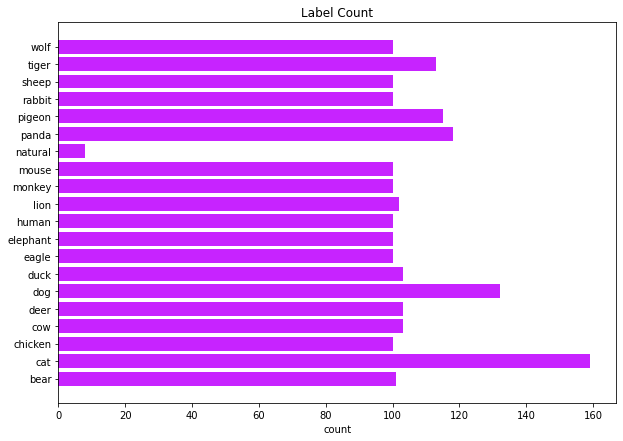

In [8]:
y_axis = list(count_values.keys())
values = count_values.values()

plt.figure(figsize=(10,7))
plt.barh(y_axis, values, color='#C723FF')
plt.xlabel('count')
plt.title('Label Count')
plt.show()

In [8]:
data['data'].shape

(2057, 80, 80, 3)

In [9]:
data['labels']

{'bear',
 'cat',
 'chicken',
 'cow',
 'deer',
 'dog',
 'duck',
 'eagle',
 'elephant',
 'human',
 'lion',
 'monkey',
 'mouse',
 'natural',
 'panda',
 'pigeon',
 'rabbit',
 'sheep',
 'tiger',
 'wolf'}

In [10]:
data['target'].index('wolf')

1957

In [11]:
for i,c in enumerate(data['labels']):
    print(i,c)

0 eagle
1 bear
2 cat
3 chicken
4 panda
5 wolf
6 mouse
7 lion
8 dog
9 duck
10 deer
11 rabbit
12 tiger
13 sheep
14 pigeon
15 cow
16 elephant
17 human
18 natural
19 monkey


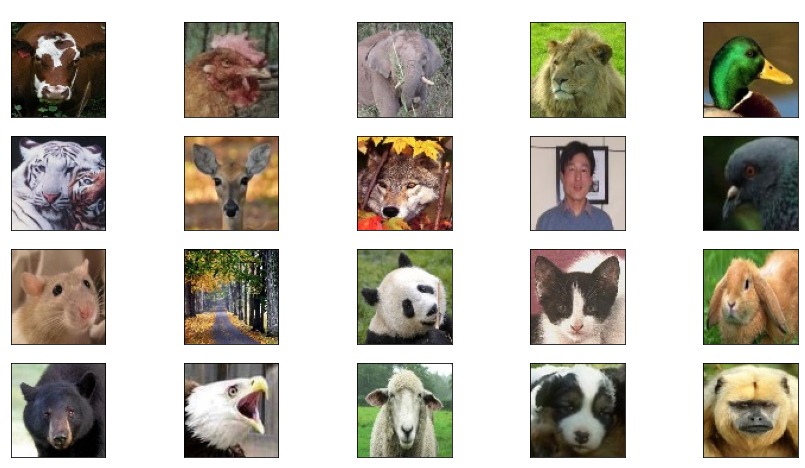

In [11]:
plt.figure(figsize=(15,8))

for i,c in enumerate(data['labels']):
    index = data['target'].index(c)
    img = data['data'][index]
    
    plt.subplot(4,5,i+1)
    plt.imshow(img)
    plt.xticks([]), plt.yticks([])
    plt.title(c, color = 'w')
    
plt.show()
    